# Tropical Cyclone
---

An the end of February 2025, the tropical cyclone Honde affected the southern coast of Madagascar. It caused very heavy rainfall and strong winds. <br>

This example shows analysis of the selected parameter:
- [`tc`](https://codes.ecmwf.int/grib/param-db/129) tropical cyclone trajectory of the **IFS** datasets on 28 February at 00 UTC in Madagascar (22.95° S, 44.1° E).

## 1. Set Up Your Environment and Find ECMWF Open Data
Open data will be downloaded from a publicly available [Amazon S3 Bucket](../datadownload/find-data.ipynb). First, the following Python libraries need to be installed in the current Jupyter kernel:
- `ecmwf-opendata` to download data,
- `earthkit` to analyse and plot the data,
- `matplotlib` to create visualizations, and
- `cartopy` for cartographic visualizations.

:::{seealso}
More detailed information about how to install Python packages is available on the [Retrieve Data](../datadownload/data-download.ipynb) website.
:::
If the packages are not installed yet, uncomment the code below and run it.

In [ ]:
# !pip3 install earthkit ecmwf-opendata matplotlib cartopy

In [1]:
from ecmwf.opendata import Client
import earthkit.data as ekd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

(content:references:listParam_tc)=
### List of parameters to retrieve from open datasets
The selected values below can be modified.

In [2]:
PARAM_SFC = ["tc"]
LEVELTYPE = "sfc"

DATES = [20250228, 20250301]
TIME = 0
STEPS = 240
STREAM = "oper"
TYPE = "tf"
MODEL = "ifs"

### Get the data using the ECMWF Open Data API

In [3]:
def get_open_data(date, time, step, stream, _type, model, param, leveltype, levelist=[]):
    client = Client(source="aws")
    list_of_files = []
    # Get the data for all dates
    for _date in DATES:
        filename = f"{model}_{''.join(param)}_{''.join(map(str, levelist))}_{_date}.grib2" if levelist else f"{model}_{''.join(param)}_{leveltype}_{_date}.grib2"
        data = client.retrieve(
            date=_date,
            time=time,
            step=step,
            stream=stream,
            type=_type,
            levtype=leveltype,
            levelist=levelist,
            param=param,
            model=model,
            target=filename
            )
        list_of_files.append(filename)
    return data, list_of_files

## 2. Tropical cyclone tracks

When using the `ls()` method, metadata from the header section of the BUFR we downloaded will be displayed.

In [4]:
data, list_of_files = get_open_data(date=DATES,
                                    time=TIME,
                                    step=STEPS,
                                    stream=STREAM,
                                    _type=TYPE,
                                    model=MODEL,
                                    param=PARAM_SFC,
                                    leveltype=LEVELTYPE,
                                    levelist=[])

# Select AIFS model data from 28 February 2025
ds = ekd.from_source("file", list_of_files[0])
ds.ls()

,edition,type,subtype,c,mv,lv,subsets,compr,typicalDate,typicalTime,ident,lat,lon
0,4,7,32,98,35,0,1,0,20250228,000000,None,None,None
1,4,7,32,98,35,0,1,0,20250228,000000,None,None,None
2,4,7,32,98,35,0,1,0,20250228,000000,None,None,None
3,4,7,32,98,35,0,1,0,20250228,000000,None,None,None


:::{tip}
To learn more about how to extract BUFR data into a Pandas dataframe, visit [BUFR: using SYNOP data](https://earthkit-data.readthedocs.io/en/latest/examples/bufr_synop.html) website.
:::

In [5]:
df = ds.to_pandas(columns=["latitude", "longitude", "pressureReducedToMeanSeaLevel"])
df

,latitude,longitude,pressureReducedToMeanSeaLevel
0,-19.9,55.4,97700.0
1,-21.6,55.3,99200.0
2,-22.8,54.8,99100.0
3,-24.2,54.8,99500.0
4,-25.9,54.8,99100.0
...,...,...,...
103,-20.4,174.1,100700.0
104,-20.7,173.6,100600.0
105,-20.7,174.4,100700.0
106,-20.4,173.7,100600.0


We will plot pressure reduced to mean sea level data in hPa, therefore we need to divide them by 100.

In [6]:
pmsl = df["pressureReducedToMeanSeaLevel"] / 100
pmsl

0       977.0
1       992.0
2       991.0
3       995.0
4       991.0
        ...  
103    1007.0
104    1006.0
105    1007.0
106    1006.0
107    1008.0
Name: pressureReducedToMeanSeaLevel, Length: 108, dtype: float64

## 3. Data visualisation

The plot below shows the tropical cyclone track for TC Honde on 28 February 2025.

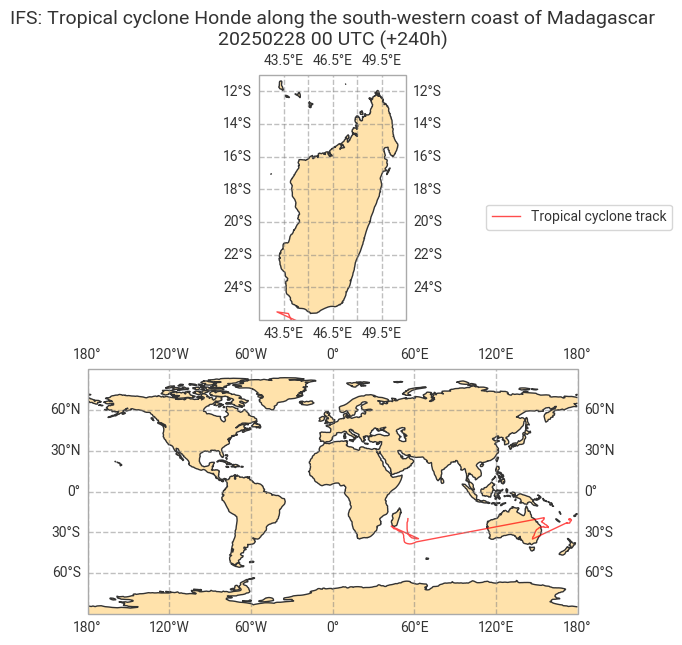

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=2, subplot_kw={'projection': ccrs.PlateCarree()})

ax1.plot(df["longitude"], df["latitude"],
         color='red',
         label="Tropical cyclone track",
         linewidth=1,
         alpha=0.7,
         transform = ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, facecolor="#ffe2ab")
ax1.set_title("IFS: Tropical cyclone Honde along the south-western coast of Madagascar\n"
              f"{DATES[0]} 00 UTC (+{STEPS}h)",
              fontsize=14)
ax1.gridlines(draw_labels=True,
              linewidth=1,
              color='gray',
              alpha=0.5,
              linestyle='--') 
ax1.coastlines(color="#333333")
ax1.set_extent([42, 51, -26, -11], crs=ccrs.PlateCarree())
ax1.legend(loc="best", bbox_to_anchor=(1.5, 0., 0.5, 0.5))

ax2.plot(df["longitude"], df["latitude"],
         color='red',
         linewidth=1,
         alpha=0.7,
         transform = ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, facecolor="#ffe2ab")
ax2.gridlines(draw_labels=True,
              linewidth=1,
              color='gray',
              alpha=0.5,
              linestyle='--') 
ax2.coastlines(color="#333333")
ax2.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

fig.savefig(f"./plots/{''.join(PARAM_SFC)}_{MODEL}_{DATES[0]}{TIME}-{STEPS}h.png")

_To be continued_